In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("atp_tennis.csv", parse_dates=["Date"])

In [3]:
df.dtypes

Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Player_1              object
Player_2              object
Winner                object
Rank_1                 int64
Rank_2                 int64
Pts_1                  int64
Pts_2                  int64
Odd_1                float64
Odd_2                float64
Score                 object
dtype: object

In [4]:
df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66222,US Open,2025-09-03,Grand Slam,Outdoor,Hard,Quarterfinals,5,Auger-Aliassime F.,De Minaur A.,Auger-Aliassime F.,27,8,1965,3545,2.20,1.67,4-6 7-6 7-5 7-6
66223,US Open,2025-09-04,Grand Slam,Outdoor,Hard,Quarterfinals,5,Musetti L.,Sinner J.,Sinner J.,10,1,3205,11480,15.00,1.03,1-6 4-6 2-6
66224,US Open,2025-09-05,Grand Slam,Outdoor,Hard,Semifinals,5,Alcaraz C.,Djokovic N.,Alcaraz C.,2,7,9590,4130,1.25,4.00,6-4 7-6 6-2
66225,US Open,2025-09-06,Grand Slam,Outdoor,Hard,Semifinals,5,Auger-Aliassime F.,Sinner J.,Sinner J.,27,1,1965,11480,17.00,1.03,1-6 6-3 3-6 4-6


In [5]:
y = (df["Winner"] == df["Player_1"]).astype(int)

In [6]:
# Differences between player ranks. Negative rank_diff favors player_1
df['rank_diff'] = df['Rank_1'] - df['Rank_2']
df['points_diff'] = df['Pts_1'] - df['Pts_2']

In [7]:
# Calculate Odds (if present). Smaller odds = stronger favorite

In [ ]:
# EXPLORATORY DATA ANALYSIS
eda = df[['Date', 'Surface', 'Round', 'Series', 'Court', 'Best of', 'rank_diff', 'points_diff']].assign(y=y)

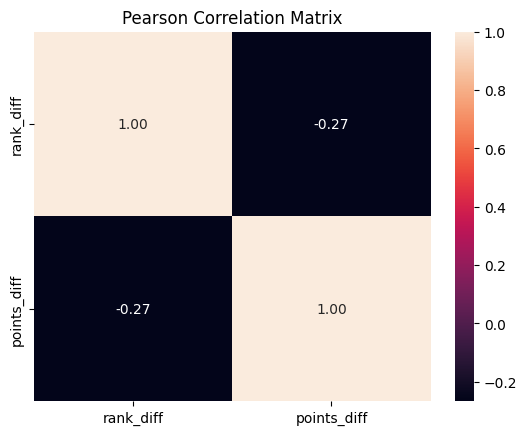

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson Correlation Heatmap
num_cols = [
    'rank_diff',
    'points_diff'
]
corr = eda[num_cols].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

TypeError: Invalid object type at position 0

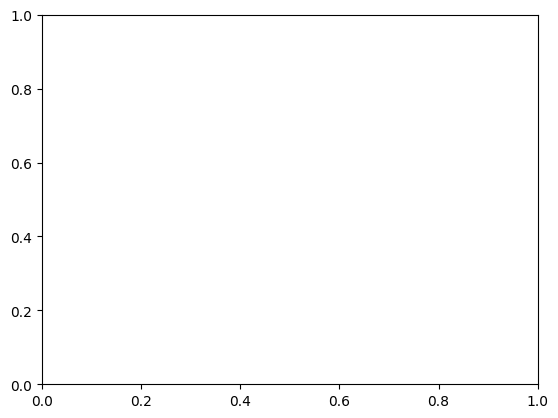

In [10]:
# Win Rate vs rank_diff
cuts = pd.qcut(eda['rank_diff'], q=12, duplicates='drop')
win_rate = eda.groupby(cuts)['y'].mean().reset_index()
sns.lineplot(data=win_rate, x='rank_diff', y='y')
plt.xticks(rotation=45)
plt.ylabel('P(Player_1 wins)')
plt.title('Win Rate vs rank_diff')
plt.show()